# Avaliando Funções de Rankeamento de Documentos
---------------------------
\
**Moniele Kunrath Santos**


Information Retrieval


Esse notebook tem o objetivo de apresentar diferenças entre **três tipos de funções** (cosseno, okapi e Dirichlet-smoothing) que fazem rankeamento de documentos no motor de busca *zettair*. A partir desse motor, fiz o rankeamento de **50 consultas** utilizando funções para avaliar o seu desempenho. O presente trabalho está separado em duas partes:



- Na primeira parte, o objetivo é verificar e **comparar as curvas de precisão e revocação** de cada *score*. Portanto, estarei utilizando os arquivos "eval_cosine.txt", "eval_okapi.txt" e "eval_default.txt" para essa tarefa. 
- Já a segunda parte desse notebook, realiza **testes-t pareados bicaudais** entre todos os pares de funções de ranking (i.e. cosseno vs okapi, okapi vs Dirichlet e Dirichlet vs cosseno). Utilizo então os arquivos: "50_eval_cosine.txt", "50_eval_okapi.txt" e "50_eval_default.txt".


## Curvas de Revocação por Precisão

*"Precision: What fraction of the returned results are relevant to the information need?"*

*"Recall: What fraction of the relevant documents in the collection were returned by the system?"*

### Cosseno

Separa os dados por " ; "

In [ ]:
inputFile = open('/work/eval_cosine.txt', 'r') 
exportFile = open('/work/new_eval_cosine.txt', 'w')
for line in inputFile:
   new_line = line.replace('\t', ';')
   exportFile.write(new_line) 

inputFile.close()
exportFile.close()

Cria o .csv com as colunas certas a partir do arquivo texto.

In [ ]:
import csv

with open('/work/new_eval_cosine.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('eval_cosine.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('eval', 'all', 'num'))
        writer.writerows(lines)

In [ ]:
import pandas as pd

cosine = pd.read_csv (r'/work/eval_cosine.csv')

cosine.head()

,eval,all,num
0,num_q,all,50.0000
1,num_ret,all,5000.0000
2,num_rel,all,688.0000
3,num_rel_ret,all,430.0000
4,map,all,0.2556


In [ ]:
recall = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [ ]:
cosine_precision_inter = [] 

for i in range(9,20):
    cosine_precision_inter.append(cosine['num'][i])

In [ ]:
cosine_precision_inter

[0.5623,
 0.5012,
 0.4415,
 0.3813,
 0.3003,
 0.251,
 0.1852,
 0.1501,
 0.116,
 0.0721,
 0.0626]

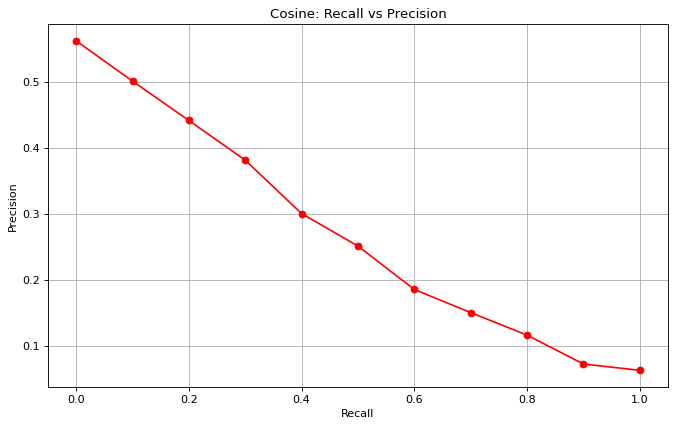

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
    
plt.plot(recall, cosine_precision_inter, color='red', marker='o')
plt.title('Cosine: Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

### Dirichlet Smoothing

Separa os dados por " ; "

In [ ]:
inputFile = open('/work/eval_default.txt', 'r') 
exportFile = open('/work/new_eval_default.txt', 'w')
for line in inputFile:
   new_line = line.replace('\t', ';')
   exportFile.write(new_line) 

inputFile.close()
exportFile.close()

Cria o .csv com as colunas certas a partir do arquivo texto.

In [ ]:
import csv

with open('/work/new_eval_default.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('eval_default.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('eval', 'all', 'num'))
        writer.writerows(lines)

In [ ]:
import pandas as pd

dirichlet = pd.read_csv (r'/work/eval_default.csv')

dirichlet.head()

,eval,all,num
0,num_q,all,50.0000
1,num_ret,all,5000.0000
2,num_rel,all,688.0000
3,num_rel_ret,all,510.0000
4,map,all,0.3482


In [ ]:
dirichlet_precision_inter = [] 

for i in range(9,20):
    dirichlet_precision_inter.append(dirichlet['num'][i])

In [ ]:
dirichlet_precision_inter

[0.6571,
 0.6096,
 0.5431,
 0.4824,
 0.3832,
 0.3574,
 0.2967,
 0.2478,
 0.1918,
 0.134,
 0.131]

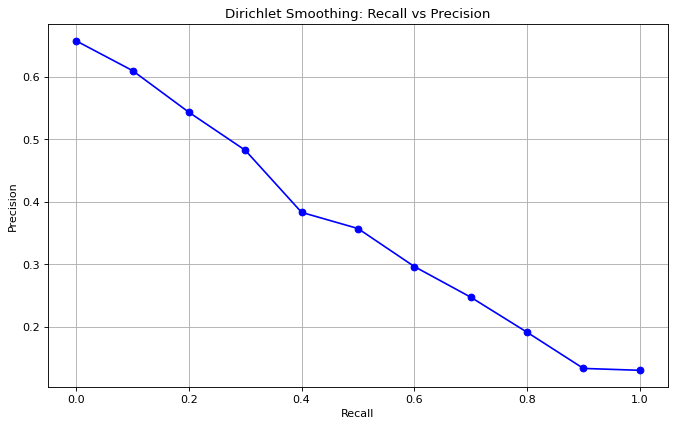

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
    
plt.plot(recall, dirichlet_precision_inter, color='blue', marker='o')
plt.title('Dirichlet Smoothing: Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

### Okapi

Separa os dados por " ; "

In [ ]:
inputFile = open('/work/eval_okapi.txt', 'r') 
exportFile = open('/work/new_eval_okapi.txt', 'w')
for line in inputFile:
   new_line = line.replace('\t', ';')
   exportFile.write(new_line) 

inputFile.close()
exportFile.close()

Cria o .csv com as colunas certas a partir do arquivo texto.

In [ ]:
import csv

with open('/work/new_eval_okapi.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('eval_okapi.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('eval', 'all', 'num'))
        writer.writerows(lines)

In [ ]:
import pandas as pd

okapi = pd.read_csv (r'/work/eval_okapi.csv')

okapi.head()

,eval,all,num
0,num_q,all,50.0000
1,num_ret,all,5000.0000
2,num_rel,all,688.0000
3,num_rel_ret,all,564.0000
4,map,all,0.4017


In [ ]:
okapi_precision_inter = [] 

for i in range(9,20):
    okapi_precision_inter.append(okapi['num'][i])

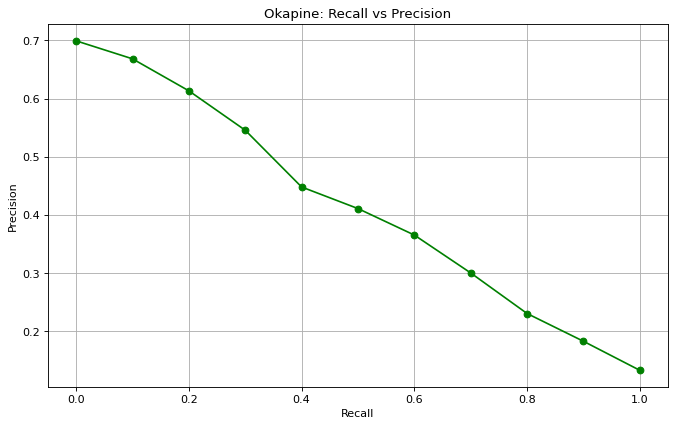

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
    
plt.plot(recall, okapi_precision_inter, color='green', marker='o')
plt.title('Okapine: Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

### Resultados Obtidos

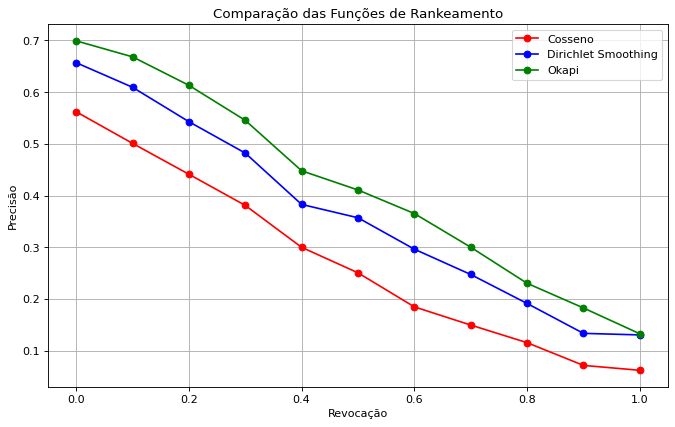

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
    
plt.plot(recall, cosine_precision_inter, color='red', marker='o', label = 'Cosseno')
plt.legend()
plt.plot(recall, dirichlet_precision_inter, color='blue', marker='o', label = 'Dirichlet Smoothing')
plt.legend()
plt.plot(recall, okapi_precision_inter, color='green', marker='o', label = 'Okapi')
plt.legend()
plt.title('Comparação das Funções de Rankeamento')
plt.xlabel('Revocação')
plt.ylabel('Precisão')
plt.grid(True)
plt.show()

## Testes-t Bicaudais

*Carregando Resultados da Função Okapi*

In [ ]:
inputFile = open('/work/partial_eval/50_eval_okapi.txt', 'r') 
exportFile = open('/work/partial_eval/new_eval_okapi.txt', 'w')
for line in inputFile:
   new_line = line.replace('\t', ';')
   exportFile.write(new_line) 

inputFile.close()
exportFile.close()

import csv

with open('/work/partial_eval/new_eval_okapi.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('/work/partial_eval/50_eval_okapi.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('eval', 'query', 'num'))
        writer.writerows(lines)


import pandas as pd

okapi_50 = pd.read_csv (r'/work/partial_eval/50_eval_okapi.csv')

okapi_50.head()

,eval,query,num
0,num_ret,251,100.0000
1,num_rel,251,35.0000
2,num_rel_ret,251,26.0000
3,map,251,0.6097
4,R-prec,251,0.6286


In [ ]:
okapi_map_list = []

In [ ]:
for i, row in okapi_50.iterrows():
    if (row['eval']) == "map            ":
        okapi_map_list.append(row['num'])
    

In [ ]:
mean_okapi_map = okapi_map_list.pop()

In [ ]:
len(okapi_map_list)

50

*Carregando Resultados da Função Cosseno*

In [ ]:
inputFile = open('/work/partial_eval/50_eval_cosine.txt', 'r') 
exportFile = open('/work/partial_eval/new_eval_cosine.txt', 'w')
for line in inputFile:
   new_line = line.replace('\t', ';')
   exportFile.write(new_line) 

inputFile.close()
exportFile.close()

import csv

with open('/work/partial_eval/new_eval_cosine.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('/work/partial_eval/50_eval_cosine.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('eval', 'query', 'num'))
        writer.writerows(lines)


import pandas as pd

cosine_50 = pd.read_csv (r'/work/partial_eval/50_eval_cosine.csv')

cosine_50.head()

,eval,query,num
0,num_ret,251,100.0000
1,num_rel,251,35.0000
2,num_rel_ret,251,21.0000
3,map,251,0.4714
4,R-prec,251,0.4857


In [ ]:
cosine_map_list = []

In [ ]:
for i, row in cosine_50.iterrows():
    if (row['eval']) == "map            ":
        cosine_map_list.append(row['num'])

mean_cosine_map = cosine_map_list.pop()
len(cosine_map_list)

50

*Carregando Resultados da Função Dirichlet*

In [ ]:
inputFile = open('/work/partial_eval/50_eval_default.txt', 'r') 
exportFile = open('/work/partial_eval/new_eval_default.txt', 'w')
for line in inputFile:
   new_line = line.replace('\t', ';')
   exportFile.write(new_line) 

inputFile.close()
exportFile.close()

import csv

with open('/work/partial_eval/new_eval_default.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split(";") for line in stripped if line)
    with open('/work/partial_eval/50_eval_default.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('eval', 'query', 'num'))
        writer.writerows(lines)


import pandas as pd

dirichlet_50 = pd.read_csv (r'/work/partial_eval/50_eval_default.csv')

dirichlet_50.head()

,eval,query,num
0,num_ret,251,100.000
1,num_rel,251,35.000
2,num_rel_ret,251,26.000
3,map,251,0.625
4,R-prec,251,0.600


In [ ]:
dirichlet_map_list = []

for i, row in dirichlet_50.iterrows():
    if (row['eval']) == "map            ":
        dirichlet_map_list.append(row['num'])

mean_dirichlet_map = dirichlet_map_list.pop()
len(dirichlet_map_list)

### Teste-t: Okapi vs Cosseno

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(cosine_map_list, okapi_map_list)

Ttest_indResult(statistic=-2.8726215977746565, pvalue=0.004990620286410119)

In [ ]:
print("MAP do cosseno: ", mean_cosine_map)
print("MAP do okapi: ", mean_okapi_map)

MAP do cosseno:  0.2556
MAP do okapi:  0.4017


    p =  0.005 < 0.05

Portanto, existe uma diferença real entre as distribuições. E como o MAP do okapi é maior que o do cosseno, O sistema que utiliza a função okapi é significativamente melhor do que o sistema que utiliza a função cosseno.

### Teste-t: Okapi vs Dirichlet

In [ ]:
stats.ttest_ind(dirichlet_map_list, okapi_map_list)

Ttest_indResult(statistic=-0.9986794265844451, pvalue=0.3204095407645079)

    p =  0.3204 > 0.05

Portanto, existe não existe uma diferença real entre as distribuições.

### Teste-t: Cosseno vs Dirichlet

In [ ]:
stats.ttest_ind(dirichlet_map_list, cosine_map_list)

Ttest_indResult(statistic=1.7622854367063594, pvalue=0.08113903119227246)

    p =  0.0811 > 0.05

Portanto, existe não existe uma diferença real entre as distribuições.

## Considerações Finais

Conclui-se, através dos experimentos apresentados, que as funções okapi e dirichlet tem um desempenho bem parecido, como se observa no gráfico da revocação por precisão, e além disso mostram ter distribuições t idênticas. Podemos inferir também que a função com pior desempenho, nesse estudo de caso, foi a função cosseno.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cc6e6f36-f551-48be-8c78-aee7ee3b63ab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>